# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

**Nama: Yorris Siagian**

**Email: yorristomson5@gmail.com**

**Username:yorris_siagian**

#  Import Library yang dibutuhkan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
import matplotlib
import sklearn
warnings.filterwarnings('ignore')


# Data Understanding

In [26]:
# Load data
df = pd.read_csv('data.csv', sep=';')
print("Info Dataset:")
print("\nContoh Data:")
print(df.head())

Info Dataset:

Contoh Data:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                  

**Insight :**
* Graduate: Nilai & evaluasi semester 2 ada dan tinggi (≥12)

* Dropout: Nilai semester 2 nol, tidak ikut evaluasi

* Fitur penting: Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_evaluations

* Faktor eksternal (GDP, pengangguran) & latar belakang orang tua kurang berpengaruh (di sampel kecil)

In [27]:
# Cek missing value dan duplikat
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nJumlah Baris Duplikat:")
print(df.duplicated().sum())

Jumlah Missing Values per Kolom:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment

**Insight **:
* Jumlah missing values: Tidak ada

* Jumlah baris duplikat: Nol (0)

In [28]:
# Statistik deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


**Insight :**

**Akademik**

* Nilai rata-rata semester 1: 10.6 | Semester 2: 10.2

* Jumlah mata kuliah semester 1 & 2: Rata-rata 6 per semester

* Evaluasi semester: 8 kali per semester

* Skor masuk (admission grade): Rata-rata 127 dari 190

**Karakteristik Pribadi**
* Usia saat masuk: Rata-rata 23 tahun, ada hingga 70 tahun

* Jenis kelamin: ~35% perempuan (diasumsikan: 0 = pria, 1 = wanita)

* Beasiswa: 25% adalah penerima

* Status pembayaran: 88% tertib bayar

* Disabilitas/pendidikan khusus: Hampir tidak ada

**Latar Belakang Keluarga**
* Pendidikan orang tua rata-rata tingkat sedang (kode 19–22)

* Pekerjaan orang tua: Banyak variasi, bisa menyentuh angka 190+ → kemungkinan outlier/kode klasifikasi luas

**Konteks Sosial-Ekonomi**
* Tingkat pengangguran: Rata-rata 11.6%

* Inflasi: Rata-rata 1.2%

* GDP: Mendekati nol (±2.3), indikasi fluktuatif

# EDA (Exploratory Data Analysis)

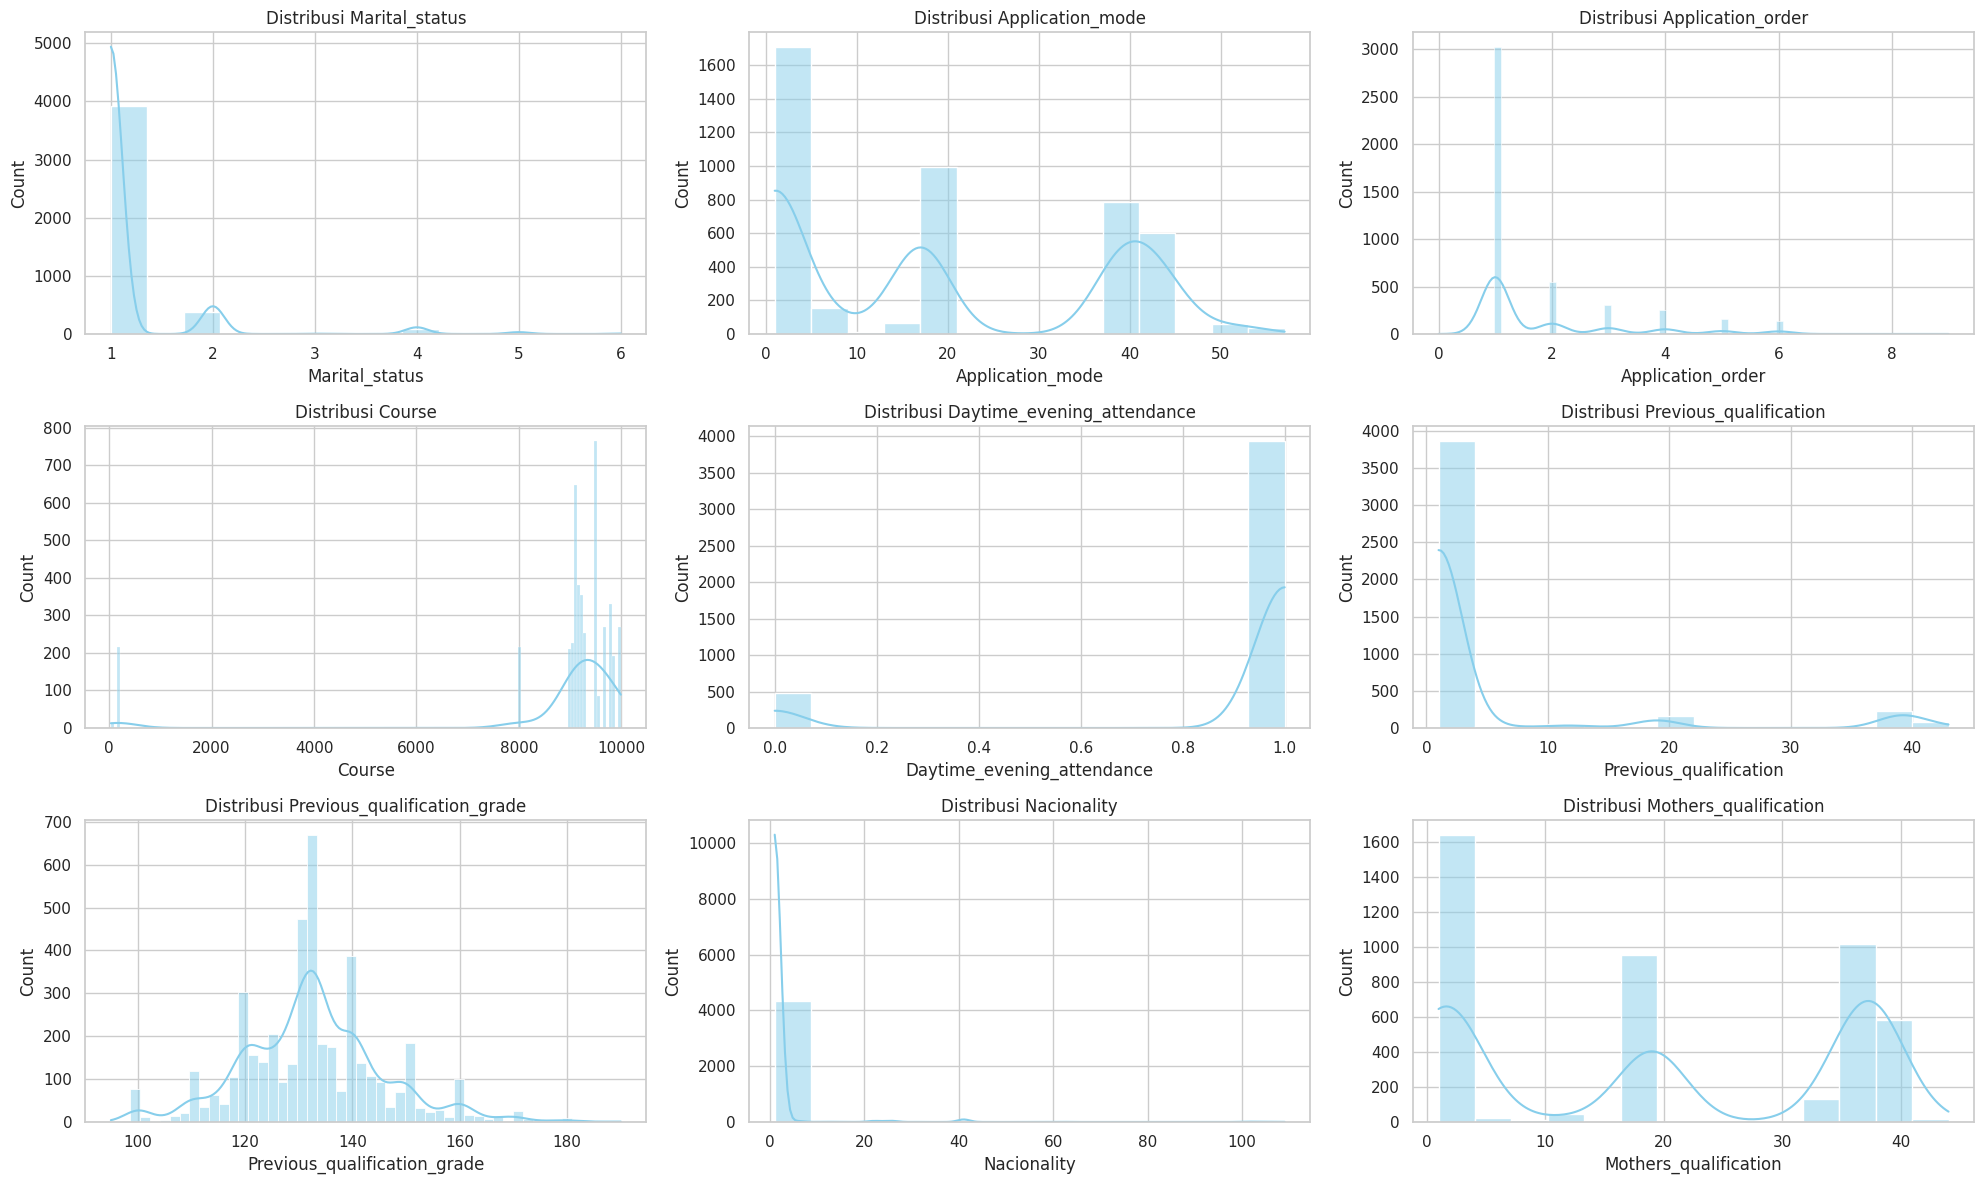

In [29]:
# Visualisasi distribusi fitur numerik
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_cols[:9]):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**insight :**
1. Mayoritas Mahasiswa Belum Menikah & Kuliah Siang

* Marital_status dan Daytime_evening_attendance sangat didominasi satu kategori.

* Sebagian besar mahasiswa adalah lajang dan kuliah reguler (bukan malam).

2. Jalur Masuk & Jurusan Tertentu Dominan

* Application_mode dan Course menunjukkan konsentrasi pada beberapa kode.

* Perlu dicek apakah jalur masuk atau jurusan ini punya dropout tinggi.

3. Mahasiswa Umumnya Diterima di Pilihan Pertama

* Application_order didominasi oleh angka 1

4. Nilai & Latar Belakang Pendidikan Bervariasi

* Previous_qualification_grade distribusinya normal

* Mothers_qualification bervariasi

5. Mahasiswa Lokal Mendominasi

* Nacionality sangat tidak seimbang

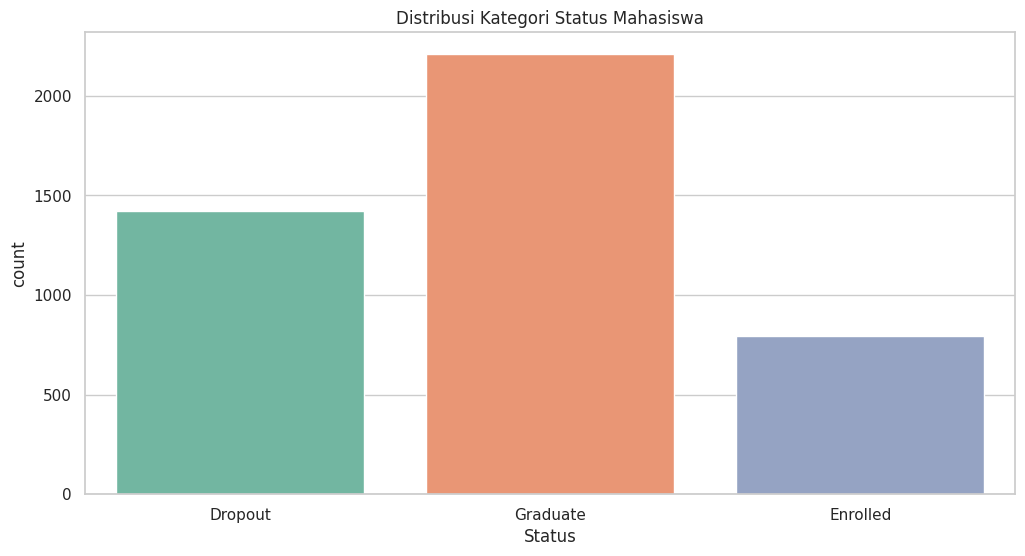

In [30]:
# Visualisasi target
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribusi Kategori Status Mahasiswa')
plt.show()

**Insight :**
* Mayoritas Mahasiswa Lulus

  Sebagian besar mahasiswa dalam dataset ini berhasil menyelesaikan studi dan lulus (kategori Graduate).

* Dropout Relatif Tinggi

  Jumlah mahasiswa yang dropout cukup signifikan — sekitar 40% dari total lulusan.
Ini menunjukkan potensi masalah retensi yang perlu ditelusuri lebih lanjut.

* Mahasiswa Aktif Sedikit

  Jumlah mahasiswa yang masih enrolled (aktif) jauh lebih kecil, kemungkinan karena data berfokus pada angkatan sebelumnya atau belum diperbarui.

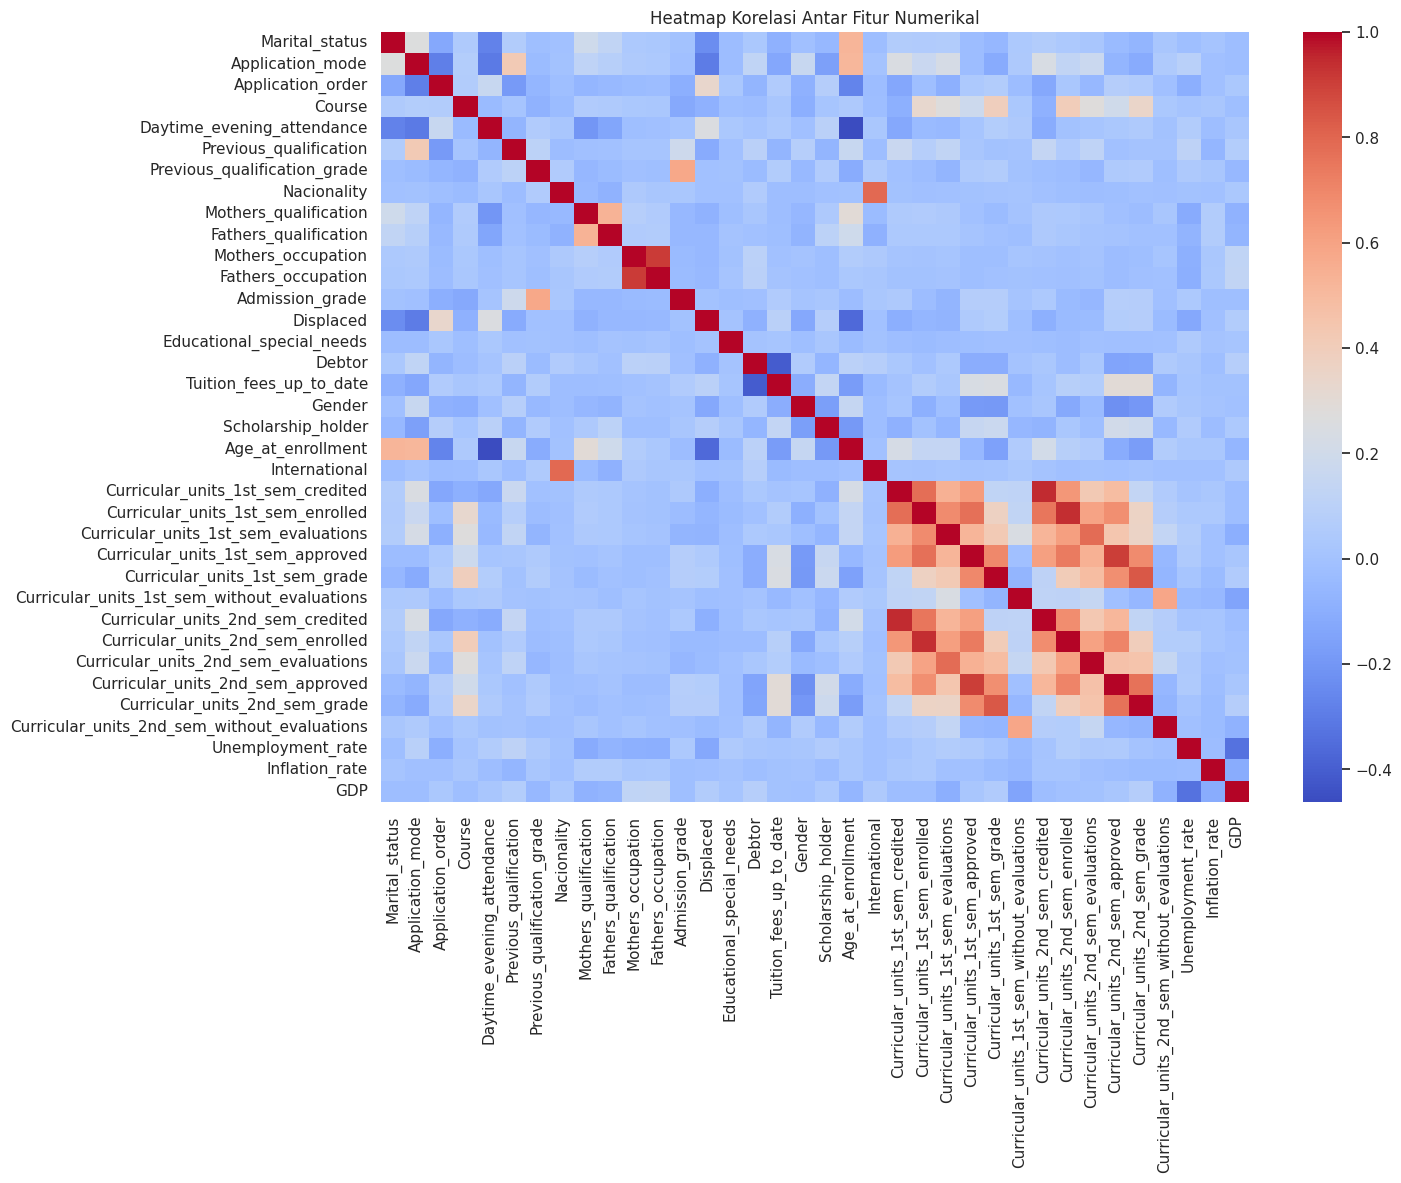

In [31]:
# Korelasi fitur numerik
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerikal')
plt.show()

**Insight :**
* Korelasi Tinggi Antar Nilai Akademik

  Fitur-fitur seperti:

  Curricular_units_1st/2nd_sem_credited,

  ..._enrolled,

  ..._approved, dan

  ..._grade
  memiliki korelasi tinggi satu sama lain (positif), menunjukkan bahwa performa mahasiswa konsisten antar semester.

* Korelasi Rendah ke Fitur Non-akademik

  Faktor-faktor seperti Gender, Age_at_enrollment, Nationality, Displaced, International, dan Special_needs memiliki korelasi lemah terhadap variabel lainnya — menandakan pengaruhnya terhadap performa akademik mungkin tidak signifikan secara linear.

* GDP, Inflasi, dan Pengangguran Tidak Berkorelasi Kuat

  Variabel makroekonomi (GDP, Inflation_rate, Unemployment_rate) hampir tidak berkorelasi dengan fitur akademik atau demografis, menandakan pengaruhnya terhadap dropout/graduation tidak langsung.

# Preprocessing (Encoding, Feature Engineering, Scaling)

In [ ]:
# Filter hanya Status Graduate dan Dropout
df = df[df['Status'].isin(['Dropout', 'Graduate'])].copy()

In [33]:
# Handling outliers
def cap_outliers(series, lower=0.01, upper=0.99):
    return np.clip(series, series.quantile(lower), series.quantile(upper))

outlier_cols = [
    'Age_at_enrollment', 'Mothers_occupation', 'Fathers_occupation',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_without_evaluations',
    'Application_mode'
]
for col in outlier_cols:
    if col in df.columns:
        df[col] = cap_outliers(df[col])


In [34]:
# Feature engineering
df['approved_ratio_1st'] = df['Curricular_units_1st_sem_approved'] / (df['Curricular_units_1st_sem_enrolled'] + 1e-5)
df['approved_ratio_2nd'] = df['Curricular_units_2nd_sem_approved'] / (df['Curricular_units_2nd_sem_enrolled'] + 1e-5)
df['total_units_enrolled'] = df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
df['total_units_approved'] = df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved']
df['evaluation_gap'] = df['total_units_enrolled'] - (df['Curricular_units_1st_sem_evaluations'] + df['Curricular_units_2nd_sem_evaluations'])


In [35]:
# Siapkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

In [36]:
# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [37]:
# Tentukan fitur numerik dan kategorikal
fitur_numerik = [
    'Age_at_enrollment', 'Admission_grade',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Unemployment_rate', 'Inflation_rate', 'GDP',
    'approved_ratio_1st', 'approved_ratio_2nd',
    'total_units_enrolled', 'total_units_approved', 'evaluation_gap'
]
fitur_kategorikal = [
    'Gender', 'Marital_status', 'Scholarship_holder', 'Debtor',
    'Tuition_fees_up_to_date', 'Displaced',
    'Educational_special_needs', 'International'
]

In [ ]:
from sklearn.impute import SimpleImputer
# Preprocessing pipeline
numerik_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
kategorikal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('numerik', numerik_pipeline, fitur_numerik),
    ('kategorikal', kategorikal_pipeline, fitur_kategorikal)
])

#Split Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X[fitur_numerik + fitur_kategorikal], y_encoded,
    test_size=0.2, stratify=y_encoded, random_state=42
)

# Training Model

In [41]:
# Buat pipeline model + preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('klasifier', RandomForestClassifier(random_state=42))
])

# Latih model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_at_enrollment',
                                                   'Admission_grade',
                                                   'Curricular_units_1st_sem_approved',
                                                   'Curricular_units_1st_sem_grade',
                                                   'Unemployment_rate',
                                                   'Inflation_rate', 'GDP',
                                                   'approved_ratio_1st',
                                                   'approved_ra...
                                                   'evaluation_gap']),
                                                 ('kategorikal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital_status',
                                                   'Scholarship_holder',
                                                   'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'International'])])),
                ('klasifier', RandomForestClassifier(random_state=42))])

In [42]:
y_pred = pipeline.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
print("Random Forest")
print(f"Akurasi: {akurasi:.4f}\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Matriks Kebingungan (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred))


Random Forest
Akurasi: 0.9187

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.95      0.84      0.89       284
    Graduate       0.90      0.97      0.94       442

    accuracy                           0.92       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726

Matriks Kebingungan (Confusion Matrix):
[[238  46]
 [ 13 429]]


**Insight:** Model Random Forest menunjukkan akurasi yang tinggi yaitu 91,87%. Dalam memprediksi status mahasiswa, model ini cukup andal dengan precision 95% dan recall 84% untuk kelas dropout, yang berarti sebagian mahasiswa dropout masih belum terdeteksi. Sementara itu, untuk kelas graduate, model memiliki precision 90% dan recall 97%, menunjukkan kemampuan yang sangat baik dalam mengenali lulusan. Matriks kebingungan memperlihatkan bahwa dari total mahasiswa dropout, 238 terdeteksi dengan benar sedangkan 46 salah diklasifikasikan sebagai graduate. Di sisi lain, hanya 13 lulusan yang salah dikategorikan sebagai dropout dari total 442 lulusan.

# Simpan Model

In [44]:
# Simpan model
joblib.dump(pipeline, 'model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')
print("Model dan label encoder berhasil disimpan.")

Model dan label encoder berhasil disimpan.
